In [1]:
setwd("/Users/will/Documents/data/ptt_SCU")   #設定R執行路徑
myDir = "/Users/will/Documents/data/ptt_SCU"

In [2]:
allFiles = list.files(path=myDir,pattern="*.txt")
#allFiles = list.files("c:/data/in",".txt",full.names = T)
myText = NULL

In [3]:
#使用for迴圈讀N的檔案，myText是一個文字向量，
#myText文字向量中每一個元素(Entries)儲存一篇文章內容
for (i in 1 : length(allFiles)) 
{
  t0 = readLines(allFiles[i])
  t1 = paste(t0,collapse=" ")
  myText = c(myText,t1)
}

In [4]:
library(jiebaR)

mySeg = worker() # 建立一個jiebaR斷詞環境變數

Loading required package: jiebaRD


In [5]:
myText2 = NULL

In [6]:
for (i in 1:length(myText)){
  t0 = myText[i]
  #t1 = mySeg <= t0
  t1 = segment(t0,mySeg)
  #t1 <- t1[nchar(t1)>1 & nchar(t1)<7] #去除字符長度小於2的詞語,&<7
  t1 <- t1[nchar(t1)>1] #去除字符長度小於2的詞語
  #t1 <- t1[nchar(t1)>0] #去除字符長度小於1的詞語
  t1=gsub(pattern='[a-zA-Z[:punct:][:digit:]]',replacement='',t1)
  myText2 = c(myText2,paste0(t1,collapse=" "))
}

In [7]:
library(dplyr)
#將文章轉成data.frame格式
text_df = data_frame(doc_id = 1:length(myText2), text = myText2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“`data_frame()` is deprecated, use `tibble()`.
This warning is displayed once per session.”

In [8]:
library(tidytext)

In [9]:
tok99 = function(t) strsplit(t,"[ ]{1,}")
#strsplit()函數分割字串
td1 = unnest_tokens(text_df, word, text, token=tok99)
td1

#直接在源頭td1去掉空白字元
td1=td1 %>% filter(word != "")
td1

td_count = dplyr::count(td1, word, sort = TRUE)
td_count

doc_id,word
1,作者
1,電腦
1,球評
1,看板
1,標題
1,炸裂
1,雙響
1,時間
1,來啦
1,方向


doc_id,word
1,作者
1,電腦
1,球評
1,看板
1,標題
1,炸裂
1,雙響
1,時間
1,來啦
1,方向


word,n
真的,4168
日本,3687
加油,3529
台灣,3067
可以,2861
投手,2771
中華隊,2627
臺灣,2227
就是,2185
今天,2150


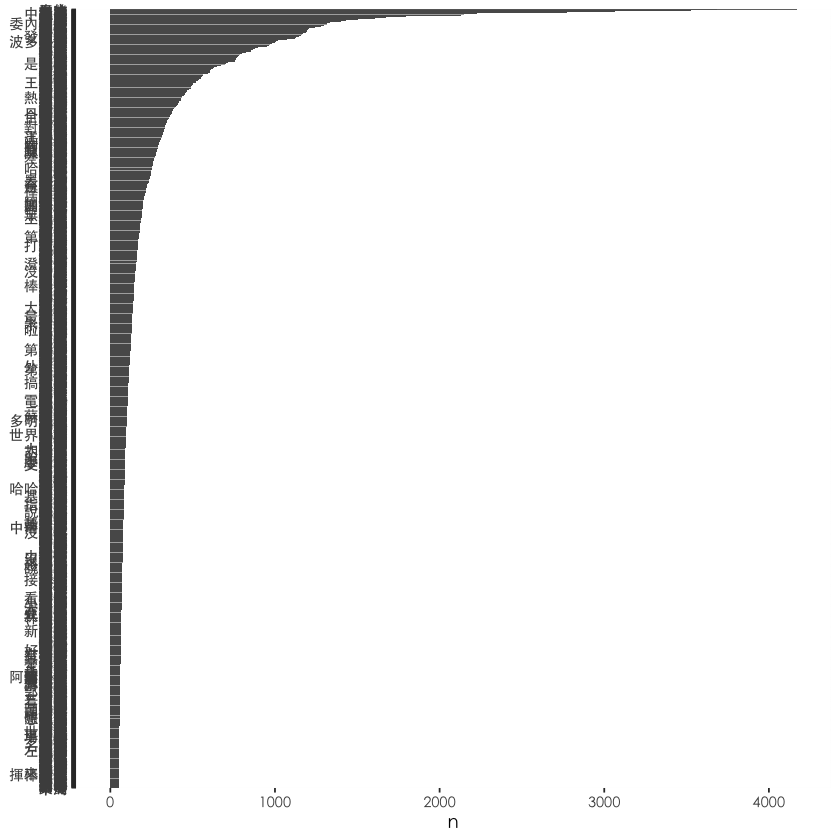

In [10]:
library(ggplot2)
par(family=('STHeiti'))
quartz()
td_count %>%
  filter(n > 50) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() +
  theme(text = element_text(family = "STHeiti"))


In [14]:
install.packages("wordcloud")

Warning message in install.packages("wordcloud"):
“installation of package ‘wordcloud’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [16]:
library(wordcloud)
quartz()
par(family=('STHeiti'))
td_count %>%
  with(wordcloud(word, n, min.freq = 20, scale=c(4,1),
                 random.order = T, ordered.colors = T, colors=1:length(word)))

ERROR: Error in library(wordcloud): there is no package called ‘wordcloud’


![worldcloud](/Users/will/Desktop/資料探勘/text_mining/worldcloud.png)

In [17]:
td2 = td1 %>%
  count(doc_id,word,sort=T) %>%
  ungroup() %>%
  bind_tf_idf(word,doc_id, n)

td2

td_tfidf = arrange(td2,desc(tf_idf))

td_tfidf

doc_id,word,n,tf,idf,tf_idf
1030,冠軍,532,0.29621381,2.1632366,0.64078055
1030,今年,530,0.29510022,1.1003424,0.32471129
1030,台灣,522,0.29064588,0.6110456,0.17759787
578,加油,478,0.19654605,1.3300006,0.26140637
578,中華隊,473,0.19449013,0.7185315,0.13974728
578,給我,466,0.19161184,2.9264513,0.56074273
578,醒來,466,0.19161184,4.0578535,0.77753278
578,統統,461,0.18955592,5.9549734,1.12880047
1060,中華,387,0.24217772,1.4152311,0.34273743
1060,恭喜,381,0.23842303,2.7631263,0.65879294


doc_id,word,n,tf,idf,tf_idf
56,吼吼,188,0.58934169,4.488636,2.6453406
495,受讓,88,0.28758170,4.655690,1.3388914
896,獲得,129,0.41747573,2.959241,1.2354114
896,恭喜,129,0.41747573,2.763126,1.1535382
578,統統,461,0.18955592,5.954973,1.1288005
219,獲得,56,0.34355828,2.959241,1.0166718
1071,呼吸,30,0.19230769,5.107676,0.9822453
219,恭喜,56,0.34355828,2.763126,0.9492949
1041,張奕,100,0.33112583,2.468618,0.8174233
495,獲得,84,0.27450980,2.959241,0.8123407


Selecting by tf_idf


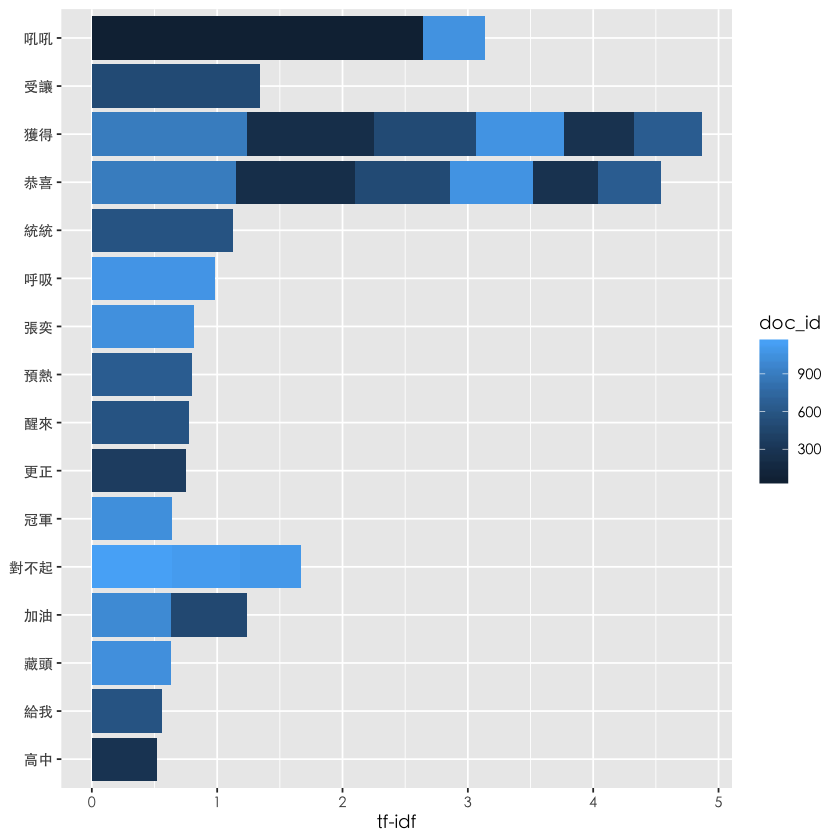

In [18]:
plot_305 = mutate(td_tfidf,word = factor(word, levels = rev(unique(word))))

quartz()
plot_305 %>%
  top_n(30) %>%
  ggplot(aes(word, tf_idf, fill = doc_id)) +
  geom_col() +
  labs(x = NULL, y = "tf-idf") +
  coord_flip() + theme(text = element_text(family = "STHeiti"))

In [19]:
library(tm)

Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate



In [20]:
dtm_tf = cast_dtm(td_tfidf, doc_id, word, n)
kk=as.matrix(dtm_tf)
gg=t(kk)
dim(dtm_tf)

[1]  1157 44627

In [21]:
inspect(dtm_tf[1:10,1:10])

<<DocumentTermMatrix (documents: 10, terms: 10)>>
Non-/sparse entries: 18/82
Sparsity           : 82%
Maximal term length: 2
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs   更正 恭喜 吼吼 呼吸 獲得 受讓 統統 醒來 預熱 張奕
  1041    0    0    0    0    0    0    0    0    0  100
  1060    0  381    0    0  381    0    0    0    0    0
  1071    0    0    0   30    0    0    0    0    0    0
  219     0   56    0    0   56    0    0    0    0    0
  366    34    0    0    0    0    0    0    0    0    0
  495     0   84    0    0   84   88    0    0    0    0
  56      0    0  188    0    0    0    0    0    0    0
  578     0    0    0    0    0    0  461  466    0    0
  652     0  339    0    0  339    0    0    0  273    0
  896     0  129    0    0  129    0    0    0    0    0


In [22]:
dtm_tfidf = cast_dtm(td_tfidf, doc_id, word, tf_idf)

dim(dtm_tfidf)
#[1] 149 1815

inspect(dtm_tfidf[1:10,1:10])

[1]  1157 44627

<<DocumentTermMatrix (documents: 10, terms: 10)>>
Non-/sparse entries: 18/82
Sparsity           : 82%
Maximal term length: 2
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs        更正      恭喜     吼吼      呼吸      獲得     受讓   統統
  1041 0.0000000 0.0000000 0.000000 0.0000000 0.0000000 0.000000 0.0000
  1060 0.0000000 0.6587929 0.000000 0.0000000 0.7055512 0.000000 0.0000
  1071 0.0000000 0.0000000 0.000000 0.9822453 0.0000000 0.000000 0.0000
  219  0.0000000 0.9492949 0.000000 0.0000000 1.0166718 0.000000 0.0000
  366  0.7511344 0.0000000 0.000000 0.0000000 0.0000000 0.000000 0.0000
  495  0.0000000 0.7585053 0.000000 0.0000000 0.8123407 1.338891 0.0000
  56   0.0000000 0.0000000 2.645341 0.0000000 0.0000000 0.000000 0.0000
  578  0.0000000 0.0000000 0.000000 0.0000000 0.0000000 0.000000 1.1288
  652  0.0000000 0.5038729 0.000000 0.0000000 0.5396357 0.000000 0.0000
  896  0.0000000 1.1535382 0.000000 0.0000000 1.2354114 0.000000 0.0000
      Terms
Docs       

In [23]:
library(Matrix)

# cast into a Matrix object
m = cast_sparse(td_tfidf, doc_id, word, tf_idf)

dim(m)

[1]  1157 44627

In [24]:
DTM=as.matrix(m)
TDM=t(DTM)
write.table(gg, file = "149_gg.CSV", sep = ",")
write.table(TDM, file = "149_TDM.CSV", sep = ",")


In [25]:
library(topicmodels)

#DTM2 = removeSparseTerms(DTM, 0.9) 

#利用LDA函數建立一個擁有五個主題的topic model，稱為DTM_lda
DTM_lda_VEM <- LDA(dtm_tf, k = 3, method="VEM", control = list(seed = 1234321))
DTM_lda_VEM

DTM_lda_Gibbs <- LDA(dtm_tf, k = 3, method="Gibbs", control = list(seed = 1234321))
DTM_lda_Gibbs

A LDA_VEM topic model with 3 topics.

A LDA_Gibbs topic model with 3 topics.

In [26]:
library(tidytext)

ap_topics_VEM <- tidy(DTM_lda_VEM, matrix = "beta")
ap_topics_VEM
#write.table(ap_topics_VEM, file = "coso_ap_topics_VEM_20171225.CSV", sep = ",")

ap_topics_Gibbs <- tidy(DTM_lda_Gibbs, matrix = "beta")
ap_topics_Gibbs

topic,term,beta
1,吼吼,8.265279e-22
2,吼吼,1.408217e-03
3,吼吼,3.016522e-14
1,受讓,4.237413e-05
2,受讓,5.659203e-04
3,受讓,1.143525e-22
1,獲得,2.369602e-04
2,獲得,5.857826e-03
3,獲得,6.778309e-05
1,恭喜,1.279817e-04


topic,term,beta
1,吼吼,5.144729e-07
2,吼吼,1.759828e-03
3,吼吼,7.368399e-07
1,受讓,5.144729e-07
2,受讓,7.525906e-04
3,受讓,7.368399e-07
1,獲得,5.144729e-07
2,獲得,7.625921e-03
3,獲得,8.105238e-06
1,恭喜,5.144729e-07


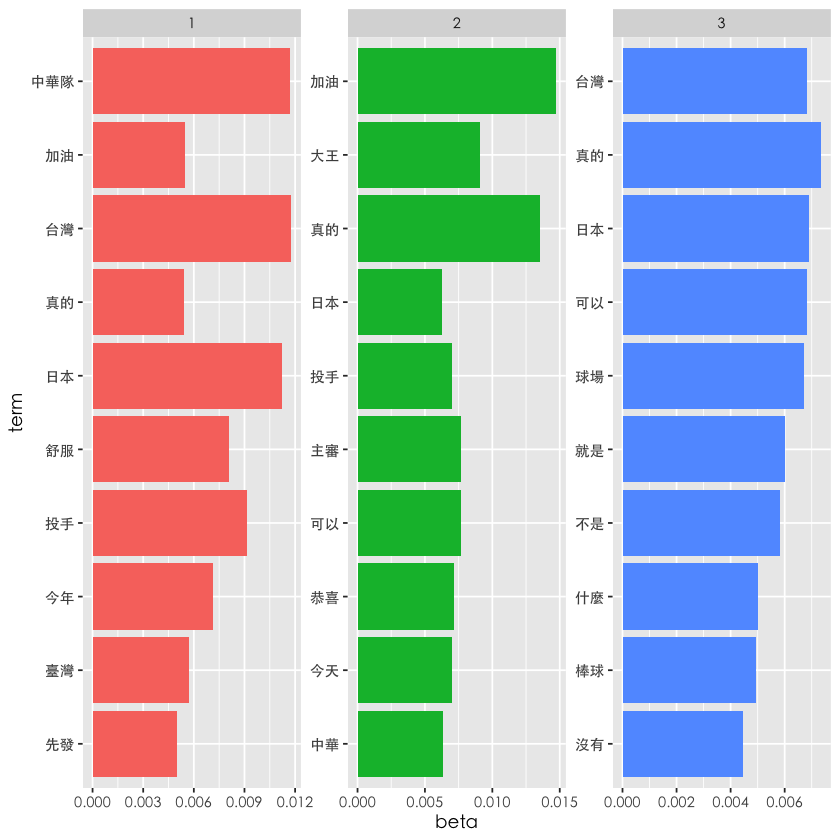

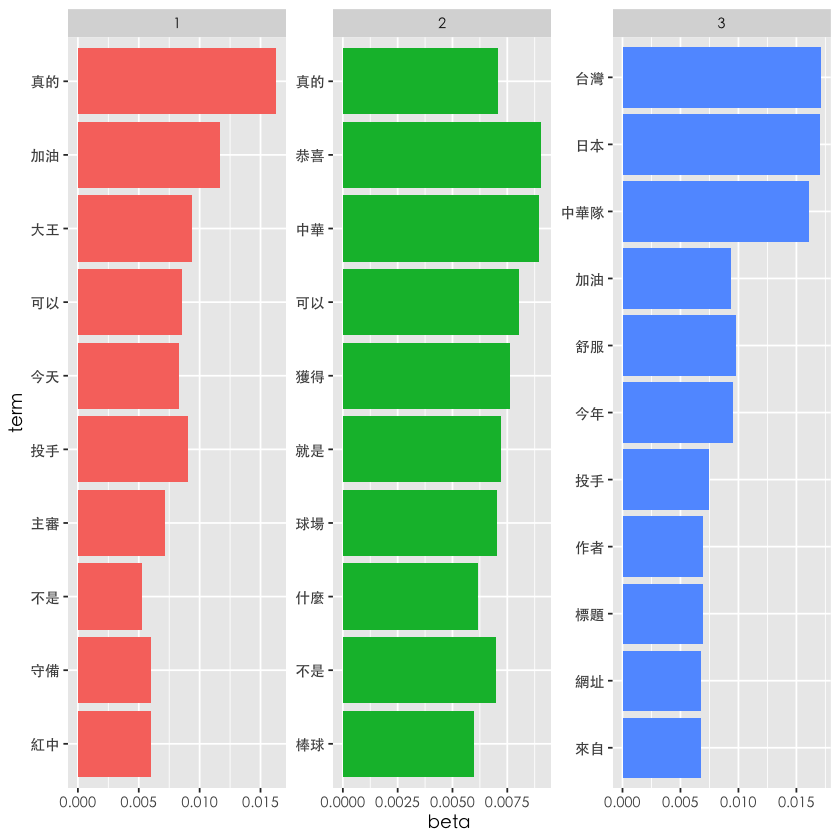

In [27]:

library(ggplot2)
library(dplyr)

ap_top_terms_VEM <- ap_topics_VEM %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

quartz()
ap_top_terms_VEM %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()+theme(text = element_text(family = "STHeiti"))


ap_top_terms_Gibbs <- ap_topics_Gibbs %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

quartz()
ap_top_terms_Gibbs %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()+theme(text = element_text(family = "STHeiti"))

In [28]:
terms(DTM_lda_VEM,50)
terms(DTM_lda_Gibbs,50)

#當然也可以全顯示並且輸出為一個CSV檔案
terms(DTM_lda_VEM,1815)
term_topic_VEM=as.matrix(terms(DTM_lda_VEM,1815))
#write.table(term_topic_VEM, file = "coso_term_topic_VEM_20171225.CSV", sep = ",")


terms(DTM_lda_Gibbs,1815)
term_topic_Gibbs=as.matrix(terms(DTM_lda_Gibbs,1815))

Topic 1,Topic 2,Topic 3
台灣,加油,真的
中華隊,真的,日本
日本,大王,台灣
投手,可以,可以
舒服,主審,球場
今年,恭喜,就是
臺灣,投手,不是
加油,今天,什麼
真的,中華,棒球
先發,日本,沒有


Topic 1,Topic 2,Topic 3
真的,恭喜,台灣
加油,中華,日本
大王,可以,中華隊
投手,獲得,舒服
可以,就是,今年
今天,真的,加油
主審,球場,投手
守備,不是,作者
紅中,什麼,標題
不是,棒球,來自


Topic 1,Topic 2,Topic 3
台灣,加油,真的
中華隊,真的,日本
日本,大王,台灣
投手,可以,可以
舒服,主審,球場
今年,恭喜,就是
臺灣,投手,不是
加油,今天,什麼
真的,中華,棒球
先發,日本,沒有


Topic 1,Topic 2,Topic 3
真的,恭喜,台灣
加油,中華,日本
大王,可以,中華隊
投手,獲得,舒服
可以,就是,今年
今天,真的,加油
主審,球場,投手
守備,不是,作者
紅中,什麼,標題
不是,棒球,來自


In [29]:
topics(DTM_lda_VEM)
doc_topic_VEM=as.matrix(topics(DTM_lda_VEM))
table(doc_topic_VEM)
#write.table(doc_topic_VEM, file = "coso_doc_topic_VEM_20171225.CSV", sep = ",")


topics(DTM_lda_Gibbs)
doc_topic_Gibbs=as.matrix(topics(DTM_lda_Gibbs))
table(doc_topic_Gibbs)

56  495  896  578  219 1071 1041  652  366 1060 1030 1145  993 1035  477  265 
   2    2    2    1    2    1    2    2    1    2    1    2    2    1    2    2 
1116  274 1053 1093   96   52  692   10  284  303  955   82  443  185  345 1028 
   2    3    2    2    2    3    1    2    3    3    3    2    3    1    1    2 
 508  865   84 1110  268  216  748  690  238  633  927  967  403  285  842  250 
   1    1    1    3    3    1    3    2    3    3    3    1    1    3    1    3 
 369  621  193  168  305  510  730  440  584  956  304 1104  204  775  966  635 
   3    3    1    3    3    1    1    1    3    3    3    2    2    3    3    1 
1132  894   57  235  106   18  236 1133  340  230  989  123  173  183  524  423 
   1    1    3    3    3    1    1    2    1    1    3    1    2    3    1    1 
 738  319  171  308  540  330 1001  881  261  654 1098  386  769  473  996  762 
   2    1    2    3    1    1    2    1    3    1    1    1    3    3    1    1 
 335  316  159  707  736  331  413  990  100   35  437  696  827  496  353  943 
   3    1    1    2    3    1    3    1    1    3    1    1    3    2    1    3 
  50   95  189  640  661  489  980  239  129  908  229  560  803  454   47  127 
   1    2    3    2    1    2    2    3    3    1    1    1    1    1    3    1 
 428  398  282 1068    1  992  378  902  474  942 1022  695  354  299  921   42 
   2    3    3    2    1    3    3    3    3    1    2    1    1    1    3    1 
 220  817 1024   67  334  548  289  766  309  922  427  390  911  212  779  952 
   2    3    2    3    3    3    1    1    3    1    3    3    1    1    1    1 
 408 1026  115  264 1063   53  948 1023  947  546  686  105  729  644  839   97 
   1    2    1    1    2    2    1    2    1    2    1    3    1    1    3    1 
 245  794 1142 1034  699  892  154 1146  174  552  595  184  511 1065 1058  499 
   3    1    2    1    1    3    2    2    2    2    2    1    1    2    2    1 
 903  771  520  355  294  457 1036  201  286  717  899  933  110  306 1109  359 
   2    2    3    1    1    1    1    3    1    2    2    3    3    3    1    1 
1150  974  622  668  859  593  563  597  702  749  889  273  400 1126   80  665 
   3    3    2    1    2    3    1    3    1    1    1    1    3    2    1    2 
 732   54  615   41 1124  735  468  459  153  336  363  376  630  141  822  527 
   2    2    1    2    1    2    1    3    3    3    3    1    2    1    1    1 
 582  731  137  971  241  498  825   31  957  780  531  506  830  770  480   94 
   1    1    2    3    1    1    1    2    1    1    3    1    1    3    1    3 
 564  683  716  240   81  442  475   90  381  341  591  237   34  703  547  720 
   3    1    2    3    3    3    3    1    3    1    1    3    3    3    1    3 
1029  456  311  478  628  223   64  515  566  970  395  961 1123  826  453  348 
   2    3    1    1    2    1    1    1    1    1    3    1    3    3    3    1 
 200  279  405  476  393  180 1050   85  555  954  221  461  298  824  450  384 
   1    1    1    2    3    1    1    1    3    1    3    3    1    1    1    1 
1031  312 1038 1129  512  234  847 1027    2  522   43  724  233 1149  228  163 
   2    3    1    1    3    1    1    1    1    3    1    2    1    1    3    1 
 950 1114  255  151  433  528 1074  365 1099  536  931  215  807 1139  709  605 
   3    2    1    2    3    1    1    3    1    2    1    2    2    1    2    2 
 391  139  242  451  647  417  797  805  509  488   77  401  482  968  213  693 
   3    1    3    3    2    3    2    3    2    1    1    3    1    2    1    3 
 649   78 1066  157    3 1009  861  728 1130  653  414  744  768 1039  254  267 
   1    2    1    2    1    2    1    2    1    1    1    1    2    2    1    2 
 533 1073  260  186  781  471  850  785  208    5  243   25  816  464  878  372 
   3    2    1    1    1    3    1    3    3    1    3    1    1    1    3    3 
 937  346  586  323  441 1046  914  111  809  415 1091  164  659  313  656  733 
   3    1    1    1    1    1    

doc_topic_VEM
  1   2   3 
560 274 323 

56  495  896  578  219 1071 1041  652  366 1060 1030 1145  993 1035  477  265 
   2    2    2    3    2    2    1    2    3    2    3    1    3    3    3    2 
1116  274 1053 1093   96   52  692   10  284  303  955   82  443  185  345 1028 
   1    2    2    1    2    3    3    3    2    2    2    1    3    3    3    1 
 508  865   84 1110  268  216  748  690  238  633  927  967  403  285  842  250 
   3    3    3    2    2    3    2    3    2    2    2    3    3    3    3    2 
 369  621  193  168  305  510  730  440  584  956  304 1104  204  775  966  635 
   2    2    3    2    2    3    3    3    3    3    2    2    2    3    2    3 
1132  894   57  235  106   18  236 1133  340  230  989  123  173  183  524  423 
   3    3    3    3    2    3    3    2    3    3    3    1    1    3    3    3 
 738  319  171  308  540  330 1001  881  261  654 1098  386  769  473  996  762 
   1    3    3    3    1    3    1    3    2    1    3    3    2    2    3    2 
 335  316  159  707  736  331  413  990  100   35  437  696  827  496  353  943 
   3    3    3    1    2    3    3    3    3    2    3    3    2    2    2    3 
  50   95  189  640  661  489  980  239  129  908  229  560  803  454   47  127 
   3    1    2    1    2    2    1    3    2    3    3    2    1    3    2    3 
 428  398  282 1068    1  992  378  902  474  942 1022  695  354  299  921   42 
   1    2    3    1    3    2    2    2    2    1    1    3    3    3    2    3 
 220  817 1024   67  334  548  289  766  309  922  427  390  911  212  779  952 
   2    2    3    2    2    3    3    3    3    3    2    3    3    2    3    3 
 408 1026  115  264 1063   53  948 1023  947  546  686  105  729  644  839   97 
   3    1    3    3    3    3    3    1    3    1    2    2    3    3    2    2 
 245  794 1142 1034  699  892  154 1146  174  552  595  184  511 1065 1058  499 
   2    3    1    1    3    3    1    1    2    1    2    3    3    1    1    3 
 903  771  520  355  294  457 1036  201  286  717  899  933  110  306 1109  359 
   2    1    2    3    3    3    3    2    3    2    2    2    2    2    1    3 
1150  974  622  668  859  593  563  597  702  749  889  273  400 1126   80  665 
   1    2    1    3    1    2    3    3    2    1    3    2    3    3    3    3 
 732   54  615   41 1124  735  468  459  153  336  363  376  630  141  822  527 
   3    3    3    3    3    1    3    2    3    3    3    3    1    3    3    3 
 582  731  137  971  241  498  825   31  957  780  531  506  830  770  480   94 
   3    3    2    2    3    3    3    1    3    3    2    3    3    2    3    3 
 564  683  716  240   81  442  475   90  381  341  591  237   34  703  547  720 
   2    3    3    2    2    2    2    3    3    1    2    2    2    2    3    2 
1029  456  311  478  628  223   64  515  566  970  395  961 1123  826  453  348 
   1    3    2    3    1    3    3    2    1    3    3    3    1    3    1    3 
 200  279  405  476  393  180 1050   85  555  954  221  461  298  824  450  384 
   3    3    3    1    3    1    3    1    2    3    2    2    3    3    3    3 
1031  312 1038 1129  512  234  847 1027    2  522   43  724  233 1149  228  163 
   1    2    3    3    2    3    3    3    3    3    1    1    3    1    2    2 
 950 1114  255  151  433  528 1074  365 1099  536  931  215  807 1139  709  605 
   2    1    3    1    2    3    3    2    3    1    3    2    1    3    1    1 
 391  139  242  451  647  417  797  805  509  488   77  401  482  968  213  693 
   2    1    2    2    1    2    2    2    1    3    3    2    3    1    3    2 
 649   78 1066  157    3 1009  861  728 1130  653  414  744  768 1039  254  267 
   3    1    3    1    1    1    1    2    3    1    3    3    1    1    3    2 
 533 1073  260  186  781  471  850  785  208    5  243   25  816  464  878  372 
   3    1    3    3    3    2    2    2    2    1    2    3    1    3    2    3 
 937  346  586  323  441 1046  914  111  809  415 1091  164  659  313  656  733 
   2    3    1    3    3    1    

doc_topic_Gibbs
  1   2   3 
364 292 501 

In [30]:
postpr_all_VEM=posterior(DTM_lda_VEM)
postpr_all_Gibbs=posterior(DTM_lda_Gibbs)

postpr_all_VEM
postpr_all_VEM_term = postpr_all_VEM$terms[1:5,1:1815]
#write.table(postpr_all_VEM_term, file = "coso_postpr_all_VEM_term_20171225.CSV", sep = ",")
postpr_all_VEM_topic = postpr_all_VEM$topics[1:149,1:5]
#write.table(postpr_all_VEM_topic, file = "coso_postpr_all_VEM_topic_20171225.CSV", sep = ",")

postpr_all_Gibbs
postpr_all_Gibbs_term = postpr_all_Gibbs$terms[1:5,1:1815]
#write.table(postpr_all_Gibbs_term, file = "coso_postpr_all_Gibbs_term_20171225.CSV", sep = ",")
postpr_all_Gibbs_topic = postpr_all_Gibbs$topics[1:149,1:5]
#write.table(postpr_all_Gibbs_topic, file = "coso_postpr_all_Gibbs_topic_20171225.CSV", sep = ",")

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' 長度超出格式長度的最大值 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.list(obj)
9. repr_list_generic(obj, "latex", "\\item %s\n", "\\item[\\$%s] %s\n", 
 .     "\\textbf{\\$%s} = %s", enum_wrap = "\\begin{enumerate}\n%s\\end{enumerate}\n", 
 .     named_wrap = "\\begin{description}\n%s\\end{description}\n", 
 .     numeric_item = "\\item

$terms
          吼吼         受讓         獲得         恭喜         統統         呼吸
1 8.265279e-22 4.237413e-05 2.369602e-04 1.279817e-04 3.096353e-03 2.272460e-04
2 1.408217e-03 5.659203e-04 5.857826e-03 7.136830e-03 3.638173e-26 1.435655e-18
          張奕         預熱         醒來         更正         冠軍       對不起
1 1.021392e-03 4.953860e-78 3.159983e-03 2.763242e-04 4.893352e-03 2.285857e-10
2 3.084851e-03 1.584244e-03 9.361372e-05 2.712844e-05 6.163612e-05 1.861417e-03
          加油         藏頭         給我         高中     多明尼哥       閃電俠
1 0.0054759622 6.687601e-05 3.261338e-03 1.723008e-04 8.317931e-06 9.362641e-05
2 0.0147204570 1.318245e-15 3.612239e-04 1.882566e-05 1.993392e-08 1.715284e-22
          國師         刺青         瓦斯         英文         陽之         大地
1 1.397362e-04 9.637974e-18 6.725707e-06 1.254166e-05 6.687601e-05 7.078333e-06
2 1.993678e-03 1.703488e-05 5.678295e-06 1.608911e-04 1.530863e-77 4.021733e-28
          嘟嘟       吳智煥       小丸子         迪克         高志         黑金
1 3.276326e-04 2.675040e-05 5.833969e-06 1.720964e-04 5.147938e-04 1.270644e-04
2 5.724271e-06 2.059276e-72 3.699250e-04 8.507737e-17 3.381799e-24 1.221205e-12
          國球         天母         川普         開講         阿鐘         開錯
1 3.556187e-05 3.974094e-28 1.999801e-04 2.862816e-13 7.464159e-75 1.664951e-57
2 1.896541e-05 6.053689e-82 5.571202e-15 7.909990e-11 1.082749e-75 1.284300e-06
          圖案         孔恩     安德魯斯         檳榔         中浩        中華
1 8.795363e-20 1.152401e-05 5.350081e-05 3.079320e-05 2.006280e-05 0.001185707
2 1.141971e-72 1.007549e-67 5.656390e-77 5.525442e-05 2.502849e-72 0.006323815
          廣播       多功能         感謝         骨科       大將軍         柏融
1 4.620826e-05 3.463675e-59 0.0004027446 1.508601e-08 1.937093e-05 1.630367e-04
2 6.231099e-06 9.200506e-76 0.0006933217 1.515082e-63 1.151609e-05 2.081604e-04
          阿里         耶塔         白宮         今年         夜店         佐藤
1 9.362641e-05 9.362641e-05 1.337520e-04 0.0071356771 6.919492e-05 1.066673e-17
2 8.126878e-79 4.665838e-78 5.576613e-21 0.0006469953 2.109125e-05 1.110470e-70
      委內瑞拉         印度       滑起來         波紋         尼哥         信義
1 0.0034742039 6.307730e-73 6.329989e-19 4.681321e-05 1.138225e-05 1.773218e-52
2 0.0043582108 3.292436e-52 3.861240e-04 5.707275e-77 4.145061e-06 2.383541e-22
          及格       小二馬         鍋貼       推不取         多名       林布融
1 1.624622e-04 1.337520e-05 0.0005478400 1.468170e-18 2.056817e-05 2.006280e-05
2 1.513752e-04 1.223224e-66 0.0042763090 1.524714e-67 3.399881e-08 1.886939e-67
          阪急         抱著       遊騎兵         達比         大阪         商務
1 8.693873e-05 5.551842e-07 6.687601e-05 9.998070e-05 4.700712e-05 2.909810e-28
2 2.306964e-76 2.897254e-10 6.079200e-74 4.773690e-26 7.226033e-06 1.546973e-33
          古巴         台體         手套         樂透         文總         轉播
1 0.0018439164 1.825727e-28 3.625461e-04 2.305446e-21 4.681321e-05 0.0001769142
2 0.0000298075 4.691799e-80 7.198101e-04 2.630043e-04 1.003083e-20 0.0005371288
        史密斯       吹口哨         抽筋       三壘海         腋下         開獎
1 5.350081e-05 9.567526e-47 4.975336e-04 1.495764e-04 1.148293e-05 1.553111e-30
2 5.827502e-76 1.816562e-71 1.056366e-04 3.598733e-06 9.548362e-06 1.873837e-04
          強項         大王       吳承諭       李東穎         賈許         家暴
1 8.534906e-05 0.0006275449 5.136176e-05 2.896878e-74 1.350280e-07 4.012560e-05
2 7.028118e-06 0.0091178004 4.212802e-71 7.905531e-76 6.961519e-05 1.884540e-75
          趁亂         道歉         福田         贏球         舒服         手勢
1 4.157695e-06 2.698530e-11 6.320246e-11 0.0011076460 0.0080982443 3.953975e-05
2 2.215140e-05 1.434449e-03 5.828632e-06 0.0008166243 0.0023810886 1.185403e-05
          壓線         村上       澄清湖         五分         明晚         教士
1 2.134416e-13 2.006280e-05 2.938172e-39 1.176032e-04 2.152699e-05 1.939404e-04
2 6.813953e-05 6.655425e-71 3.716401e-72 2.692349e-04 1.233124e-65 1.949436e-78
          坐滿         業配         推特       郭俊麟       任賢齊         韓總
1 6.711478e-06 5.931078e-06 4.735851e-05 1.649736e-04 1.131100e-04 1.401526e-

ERROR: Error in postpr_all_VEM$terms[1:5, 1:1815]: 下標超出邊界


In [33]:
install.packages('lda')
library(lda)

xx=dtm2ldaformat(dtm_tf)
names(xx)  
#查看xx有哪些內容，有兩個，其一為document，另一個為vocab
xdoc=xx$documents #文件document
xvocab=xx$vocab   #詞彙vocabulary

#install.packages('ggplot2')
library(ggplot2)
#install.packages('reshape2')
library(reshape2)


theme_set(theme_bw())  
set.seed(8675309)

#此函數top.topic.words()可以獲得每個主題的熱門詞彙和文檔
#此函數top.topic.documents()可以獲得每個主題的熱門詞彙和文檔
top.words = top.topic.words(result$topics, 5, by.score=TRUE)
a=c() 
b=c() 
for(i in 1:5) 
{ 
  a=c(a,top.words[,i]) 
  b=c(b,rep(paste("主題",i,sep=" "),5)) 
}

a = table(a, b) 
a = as.matrix(a) 
library(wordcloud)
quartz()
par(family=('STHeiti'))
comparison.cloud(a, scale = c(1, 1.5), rot.per = 0.5, colors = brewer.pal(ncol(a), 
                                                                          "Dark2"))


Warning message in install.packages("lda"):
“installation of package ‘lda’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(lda): there is no package called ‘lda’


In [35]:
N = 20

topic.proportions = t(result$document_sums) / colSums(result$document_sums)

topic.proportions = 
  topic.proportions[sample(1:dim(topic.proportions)[1], N),]

topic.proportions[is.na(topic.proportions)] =  1 / K

colnames(topic.proportions) = apply(top.words, 2, paste, collapse=" ")

topic.proportions.df = melt(cbind(data.frame(topic.proportions),
                                  document=factor(1:N)),
                            variable.name="topic",
                            id.vars = "document")  

ERROR: Error in t(result$document_sums): 找不到物件 'result'


![propotion](/Users/will/Desktop/資料探勘/text_mining/propotion.png)